<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of claasification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Choeck out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


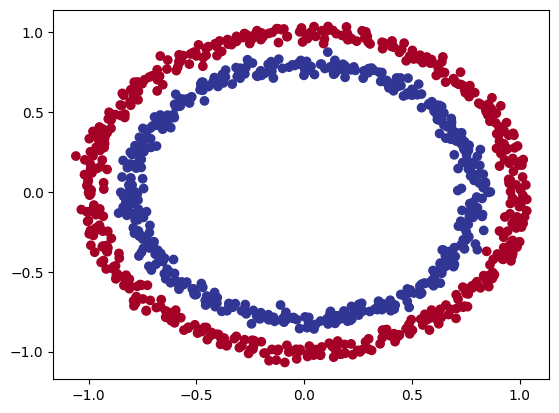

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features adn labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typicaly:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
# Import important libraries
import tensorflow as tf
tf.__version__

'2.14.0'

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model unsing the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's steop things up a notch and add a second layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936891078948975, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might look to add more layers or increase the number of hidden units within a layer
2. Compile a model - here we might choose a different optimization function sucha s Adam instead of SGD
3. Fitting a model - we might try training for longer to get a better result

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=200, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935112476348877, 0.5]

To visualize our model's predictions, let's create a function 'plot_decision_boundary'.

* Take in a trained model, features (X) and labels (y)
* Createa meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions )
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to ge tthem ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshaope(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred.reshape(xx.shape))

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


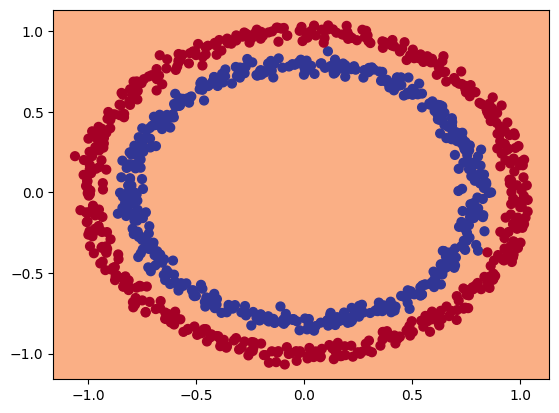

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [19]:
# Let's See if our model can be used for a regression problem...
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit our nmodel to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=200,
            verbose=0)

2/2 [==============================] - 0s 6ms/step


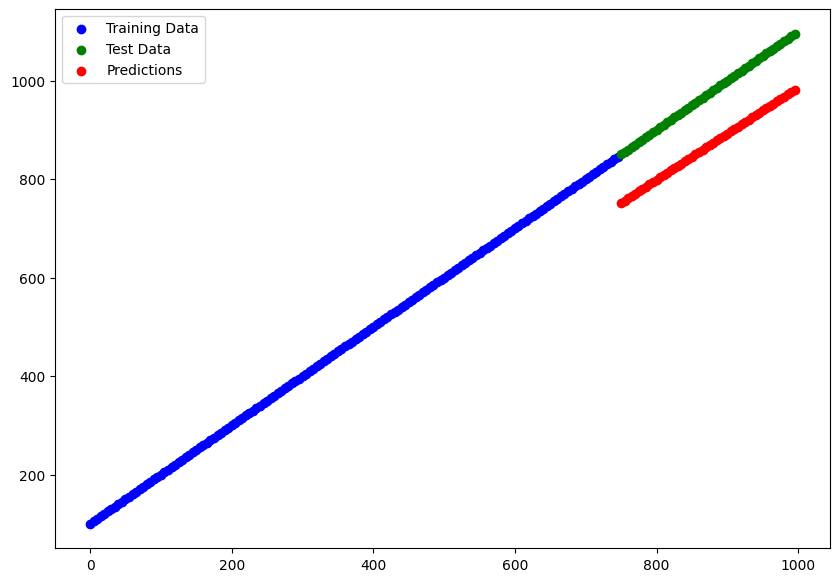

In [20]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against out regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile our model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 4.9122 - accuracy: 0.4830
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 4.7304 - accuracy: 0.4750
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 4.6886 - accuracy: 0.4730
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 4.6696 - accuracy: 0.4730
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 4.6620 - accuracy: 0.4720
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 4.5843 - accuracy: 0.4740
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 4.5413 - accuracy: 0.4730
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 4.5365 - accuracy: 0.4710
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 4.5333 - accuracy: 0.4690
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 4.5295 - accuracy: 0.4690
Epoch 11/

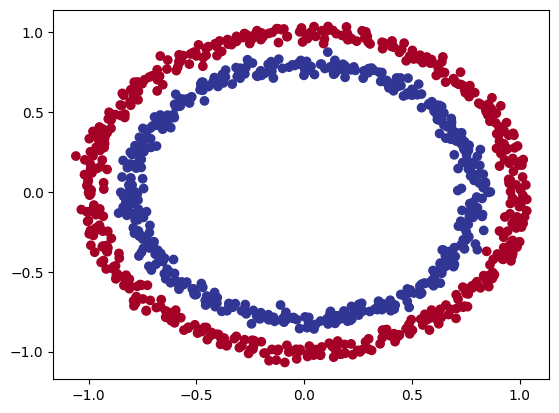

In [22]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing binary classification


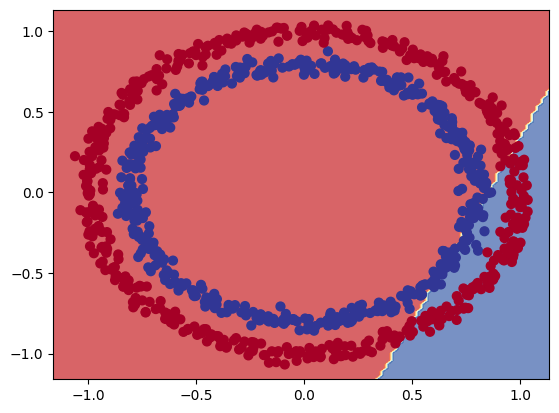

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation funtion.

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 4.3147 - accuracy: 0.4380
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4520
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1661 - accuracy: 0.4550
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1539 - accuracy: 0.4550
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1102 - accuracy: 0.4570
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 4.0835 - accuracy: 0.4590
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 4.0683 - accuracy: 0.4610
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 4.0238 - accuracy: 0.4660
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 4.0155 - accuracy: 0.4690
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 3.9946 - accuracy: 0.4670
Epoch 11/

In [25]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mode
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the Model
model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 2.4176 - accuracy: 0.4930
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1.8996 - accuracy: 0.4450
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 1.4292 - accuracy: 0.4650
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.4740
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.4730
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.4690
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8333 - accuracy: 0.4680
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.4690
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7938 - accuracy: 0.4700
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7804 - accuracy: 0.4700
Epoch 11/

In [26]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9790


[0.07536008208990097, 0.9789999723434448]

313/313 [==============================] - 0s 1ms/step
doing binary classification


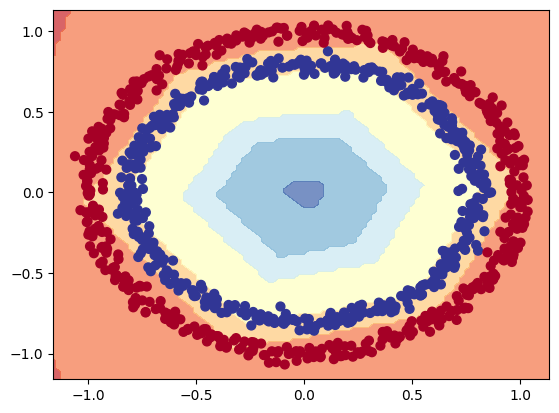

In [27]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=200, verbose=0)

In [29]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9980


[0.05726245418190956, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classification


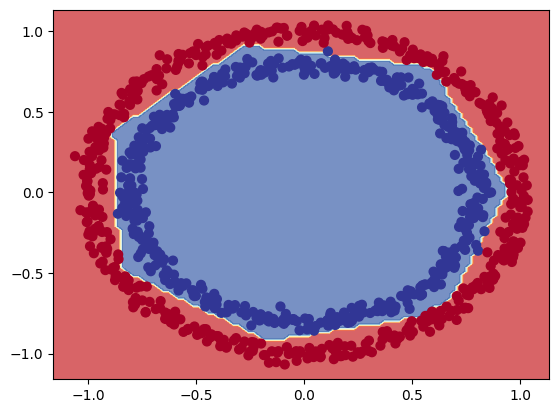

In [30]:
# Visualize the model
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [31]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

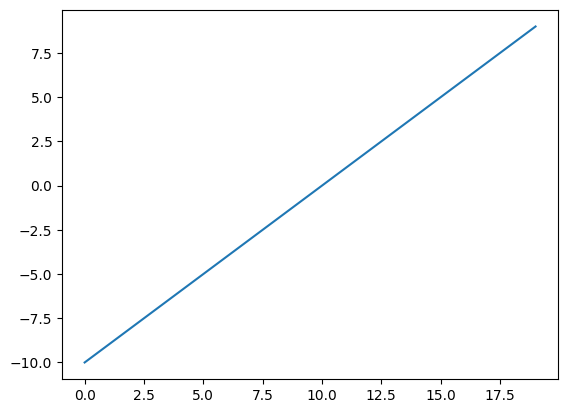

In [32]:
# Visualize our toy tensor
plt.plot(A)

In [33]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

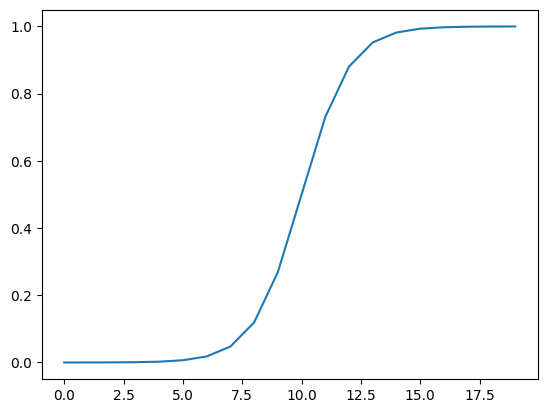

In [34]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [35]:
# Let's Recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

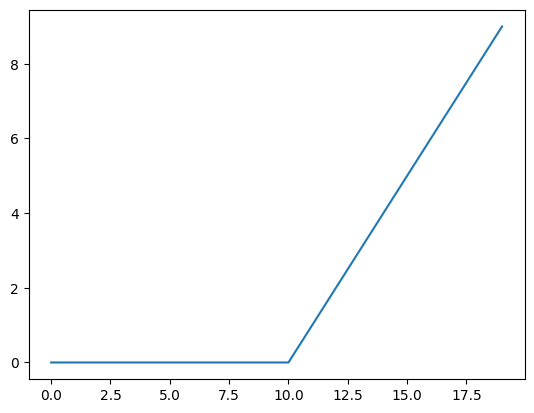

In [36]:
# Plot ReLU-modefied tensor
plt.plot(relu(A))

In [37]:
# Let's Try the linear acitvation function
def linear(x):
  return x

# Pass our toy tensor into the linear function
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

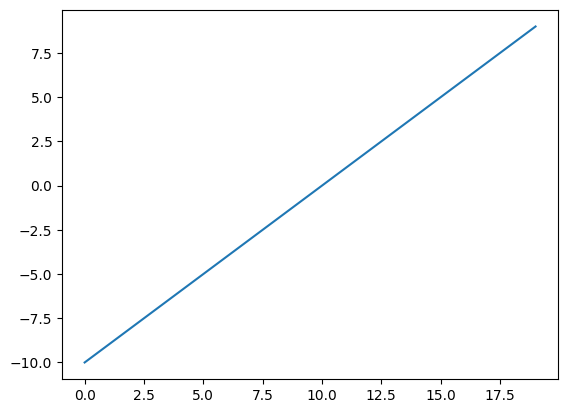

In [38]:
# Does the linear activation function change anything?
plt.plot(linear(A))

## Evaluating and improving our classification model

So far we've been trainng and testing on the same data set...

However, in machine learning this is basicaly a sin.

So let's create a training and test set.

In [39]:
# Check how many examples we have
len(X)

1000

In [40]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [41]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5200
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5138
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5200
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5312
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5337
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5650
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6062
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5775
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6438
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.5925
Epoch 11/50
25/25 [

In [42]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.8450


[0.27145302295684814, 0.8450000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


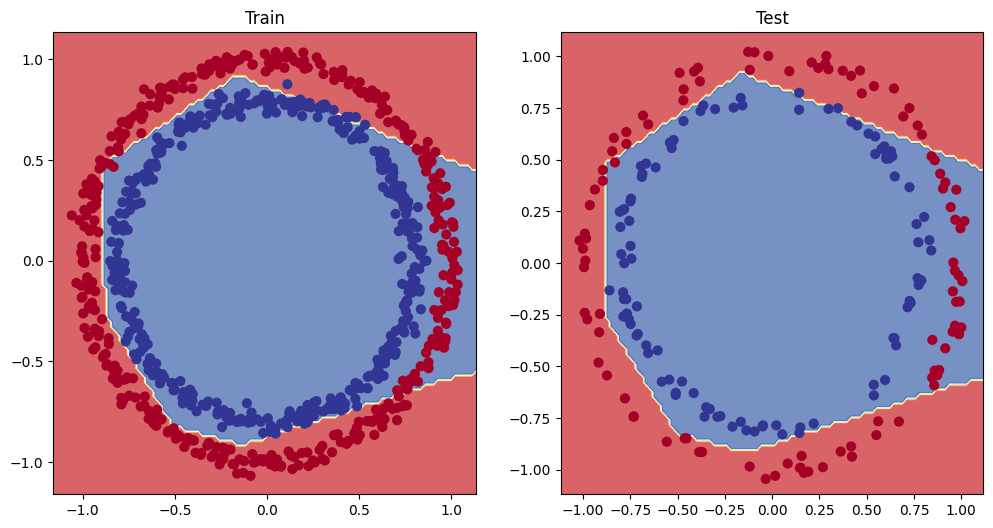

In [43]:
# Plot the desicion boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

In [44]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.691448,0.52000
1,0.689007,0.51375
2,0.686819,0.52000
3,0.684833,0.53125
4,0.682977,0.53375
5,0.678617,0.56500
6,0.671287,0.60625
7,0.666088,0.57750
8,0.657100,0.64375
9,0.644714,0.59250


Text(0.5, 1.0, 'Model_8 loss curves')

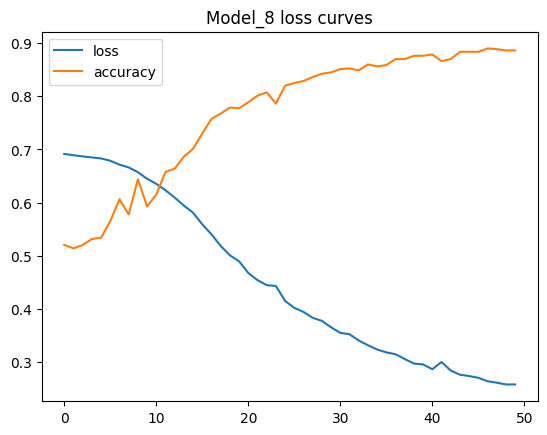

In [45]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're procticing building models here).
* A modefied loss curves plot.

In [46]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

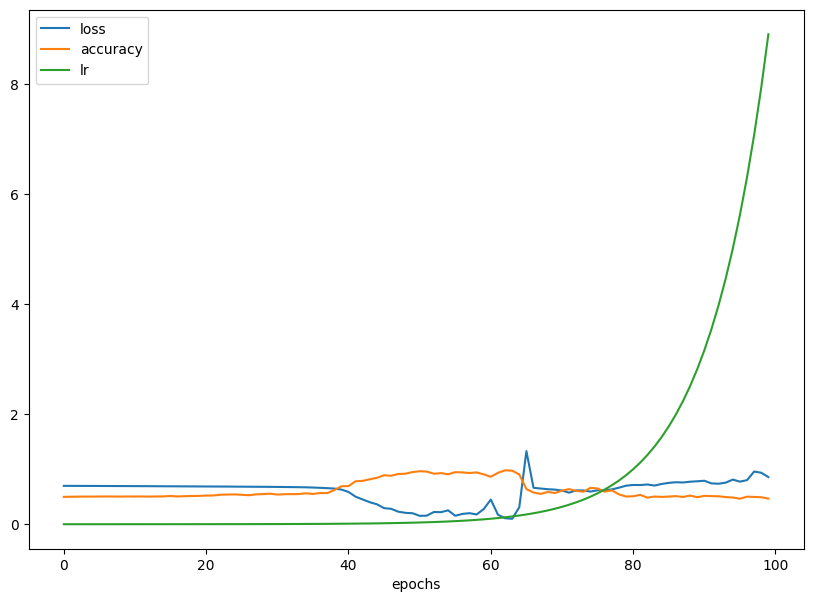

In [47]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

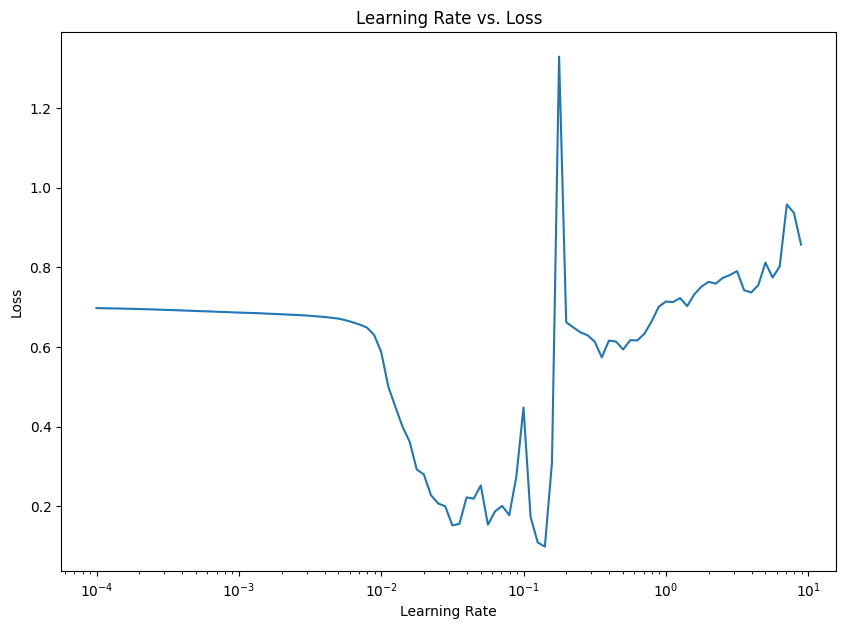

In [48]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [49]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [50]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# 3. Fit the model
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5038
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5188
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5713
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6263
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6350
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6650
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.6650
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.6725
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.6888
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.6900
Epoch 11/20
25/25 [

In [51]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7350


[0.4988431930541992, 0.7350000143051147]

In [52]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.8450


[0.27145302295684814, 0.8450000286102295]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


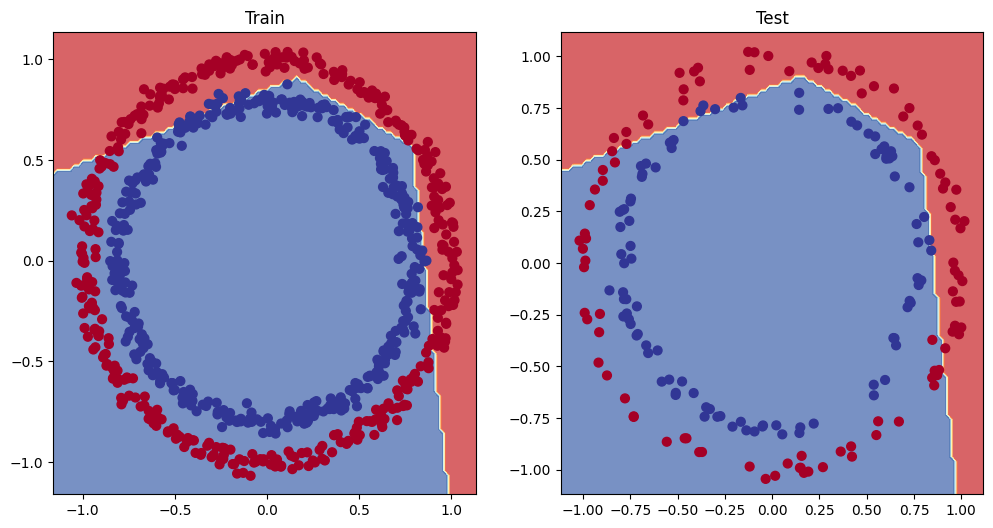

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing out models results as much as possible, there are a hanful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7350
Model loss on the test set: 0.4988431930541992
Model accuracy on the test set: 73.50%


How about a confusion matrix?

In [55]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Convert predictions probabilities to binary
y_preds = tf.round(y_preds)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


array([[53, 48],
       [ 5, 94]])

How about we prettify our confusion matrix?

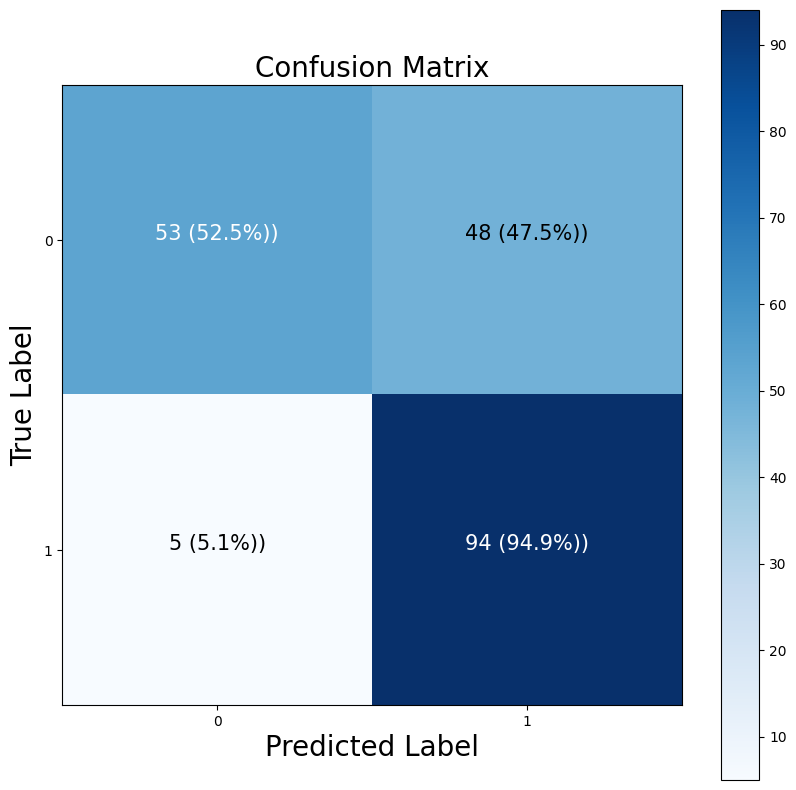

In [56]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confustion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust Label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold to different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%))",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (Multi-class Classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test data for us.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [62]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [63]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

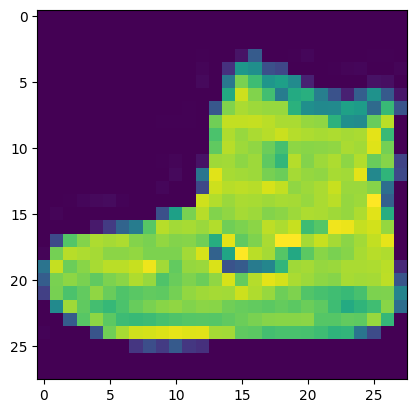

In [64]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [65]:
# Check our sample's label
train_labels[0]

9

In [149]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coast')

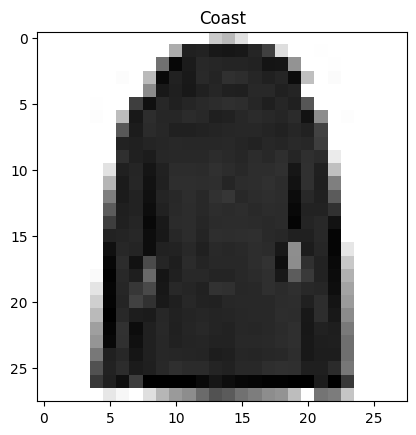

In [71]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

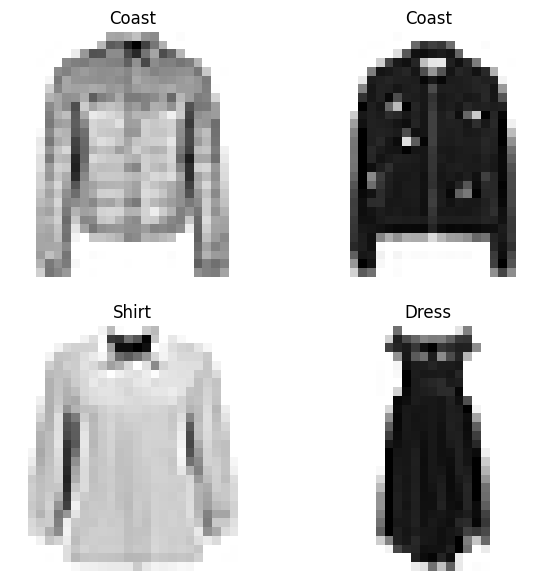

In [77]:
# Plot multiple random images of fashon MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a Multi-Class Classification Model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, howeve, were going to need to change a few things:
* Input shape: 28x28 (the shape of the image)
* Output shape: 10 (one per class)
* Loss function: tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output Layer activation: Softmax (not sigmoid)

In [90]:
# Our data needs to be flattened (from 28x28 to None,724)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [104]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2847 - accuracy: 0.1458 - val_loss: 2.1209 - val_accuracy: 0.1853
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0620 - accuracy: 0.1891 - val_loss: 1.9321 - val_accuracy: 0.2306
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7531 - accuracy: 0.2636 - val_loss: 1.7074 - val_accuracy: 0.2624
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6798 - accuracy: 0.2695 - val_loss: 1.6777 - val_accuracy: 0.2817
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6211 - accuracy: 0.3047 - val_loss: 1.6084 - val_accuracy: 0.3130
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5837 - accuracy: 0.3307 - val_loss: 1.5826 - val_accuracy: 0.3399
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5610 - accuracy: 0.3386 - val_loss: 1.5646 - val_accuracy:

In [94]:
# Check the model summary
model_11.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3140      
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this meas they like to have numbers in the tensor between 0 & 1.

In [96]:
# We can get our training and testing dat between 0 & 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [105]:
# Train a model on normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9732 - accuracy: 0.6438 - val_loss: 0.6961 - val_accuracy: 0.7731
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6220 - accuracy: 0.7894 - val_loss: 0.6379 - val_accuracy: 0.7830
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5692 - accuracy: 0.8039 - val_loss: 0.5985 - val_accuracy: 0.7919
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5416 - accuracy: 0.8143 - val_loss: 0.5649 - val_accuracy: 0.8060
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5249 - accuracy: 0.8187 - val_loss: 0.5632 - val_accuracy: 0.8023
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5122 - accuracy: 0.8230 - val_loss: 0.5694 - val_accuracy: 0.8051
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5031 - accuracy: 0.8250 - val_loss: 0.5515 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

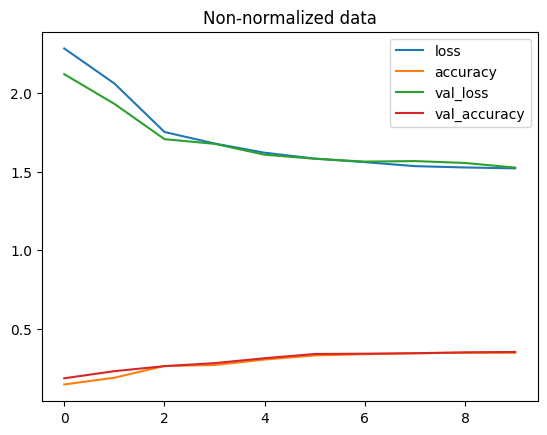

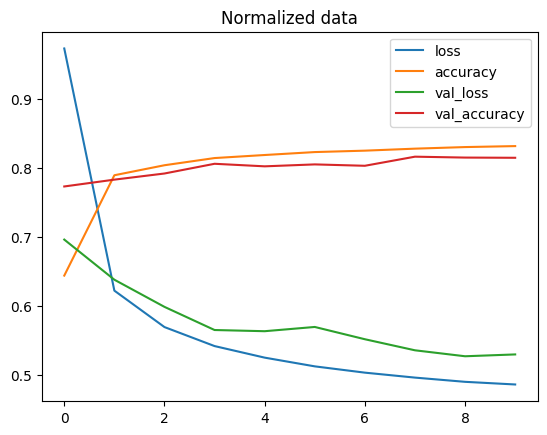

In [107]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [111]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the leanring rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
history = model_13.fit(train_data_norm,
                       train_labels,
                       epochs=40,
                       validation_data=(test_data_norm, test_labels),
                       callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.0849 - accuracy: 0.5988 - val_loss: 0.7700 - val_accuracy: 0.7301 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7053 - accuracy: 0.7542 - val_loss: 0.6808 - val_accuracy: 0.7649 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6268 - accuracy: 0.7827 - val_loss: 0.6187 - val_accuracy: 0.7876 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5667 - accuracy: 0.8053 - val_loss: 0.5741 - val_accuracy: 0.8041 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5411 - accuracy: 0.8108 - val_loss: 0.5636 - val_accuracy: 0.8024 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5266 - accuracy: 0.8175 - val_loss: 0.6093 - val_accuracy: 0.7922 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

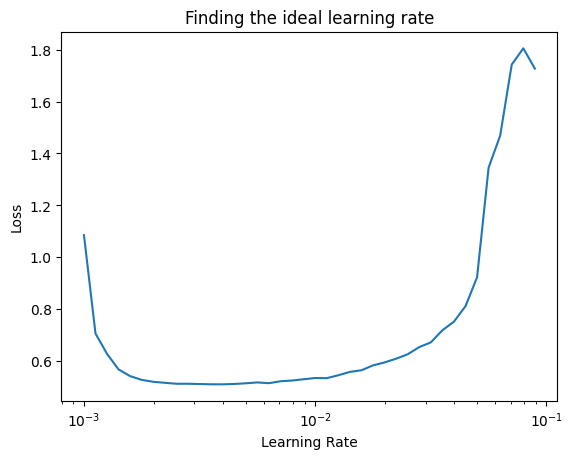

In [112]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [114]:
# Let's refit a model with the ideal laerning rate

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2102 - accuracy: 0.5400 - val_loss: 0.8402 - val_accuracy: 0.6832
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7230 - accuracy: 0.7617 - val_loss: 0.6665 - val_accuracy: 0.7810
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6124 - accuracy: 0.7969 - val_loss: 0.6106 - val_accuracy: 0.7932
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5720 - accuracy: 0.8077 - val_loss: 0.6021 - val_accuracy: 0.8006
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5552 - accuracy: 0.8123 - val_loss: 0.5820 - val_accuracy: 0.8052
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5432 - accuracy: 0.8150 - val_loss: 0.5947 - val_accuracy: 0.7947
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5345 - accuracy: 0.8171 - val_loss: 0.5784 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class clasification model we could:
* Evaluate it's performance using other classification metrics (such as a confusion matrix)
* Assess some of it's predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top two.

In [131]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=False, figsize=(10, 10), text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust Label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold to different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}\n ({cm_norm[i, j]*100:.1f}%))",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [132]:
# Make some predictions with our data
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[4.0301135e-08, 3.8932582e-09, 5.1532195e-11, 2.1006317e-09,
        1.2628658e-10, 1.3458970e-01, 1.0466386e-11, 3.5941708e-01,
        2.2612121e-04, 5.0576711e-01],
       [1.5733640e-04, 6.4838539e-05, 8.7601560e-01, 2.8362285e-04,
        8.6794466e-02, 1.7341778e-27, 3.6644768e-02, 1.1764476e-18,
        3.9386279e-05, 1.1641503e-30],
       [2.7682506e-10, 9.9998635e-01, 1.2361036e-06, 3.6635261e-06,
        8.6542050e-06, 0.0000000e+00, 1.7630102e-10, 1.7986660e-30,
        1.4330287e-12, 0.0000000e+00],
       [2.2795321e-11, 9.9999744e-01, 9.7028119e-09, 2.0292428e-06,
        4.5891488e-07, 0.0000000e+00, 2.4700506e-12, 9.0652930e-31,
        9.6312274e-14, 1.5147730e-37],
       [2.7059171e-01, 1.0421971e-04, 1.7955206e-01, 8.0947326e-03,
        1.0976871e-02, 2.5745459e-07, 5.2388477e-01, 8.2674717e-07,
        6.7945179e-03, 3.4799965e-11]], dtype=float32)

In [133]:
# Convert prediction probablities into integers
y_preds = y_probs.argmax(axis=1)

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[751,   3,  20,  85,   5,   2, 123,   0,  11,   0],
       [  0, 959,   6,  28,   5,   0,   2,   0,   0,   0],
       [ 15,   4, 676,  12, 176,   0, 111,   0,   6,   0],
       [ 44,  18,   9, 831,  47,   1,  42,   0,   8,   0],
       [  1,   1,  88,  26, 785,   0,  87,   0,  12,   0],
       [  4,   1,   0,   0,   0, 908,   0,  47,  11,  29],
       [139,   1, 104,  60, 124,   0, 559,   0,  13,   0],
       [  0,   0,   0,   0,   0,  56,   0, 926,   2,  16],
       [  6,   3,   2,   9,   5,   7,  46,   4, 918,   0],
       [  0,   0,   0,   0,   0,  26,   0,  85,   2, 887]])

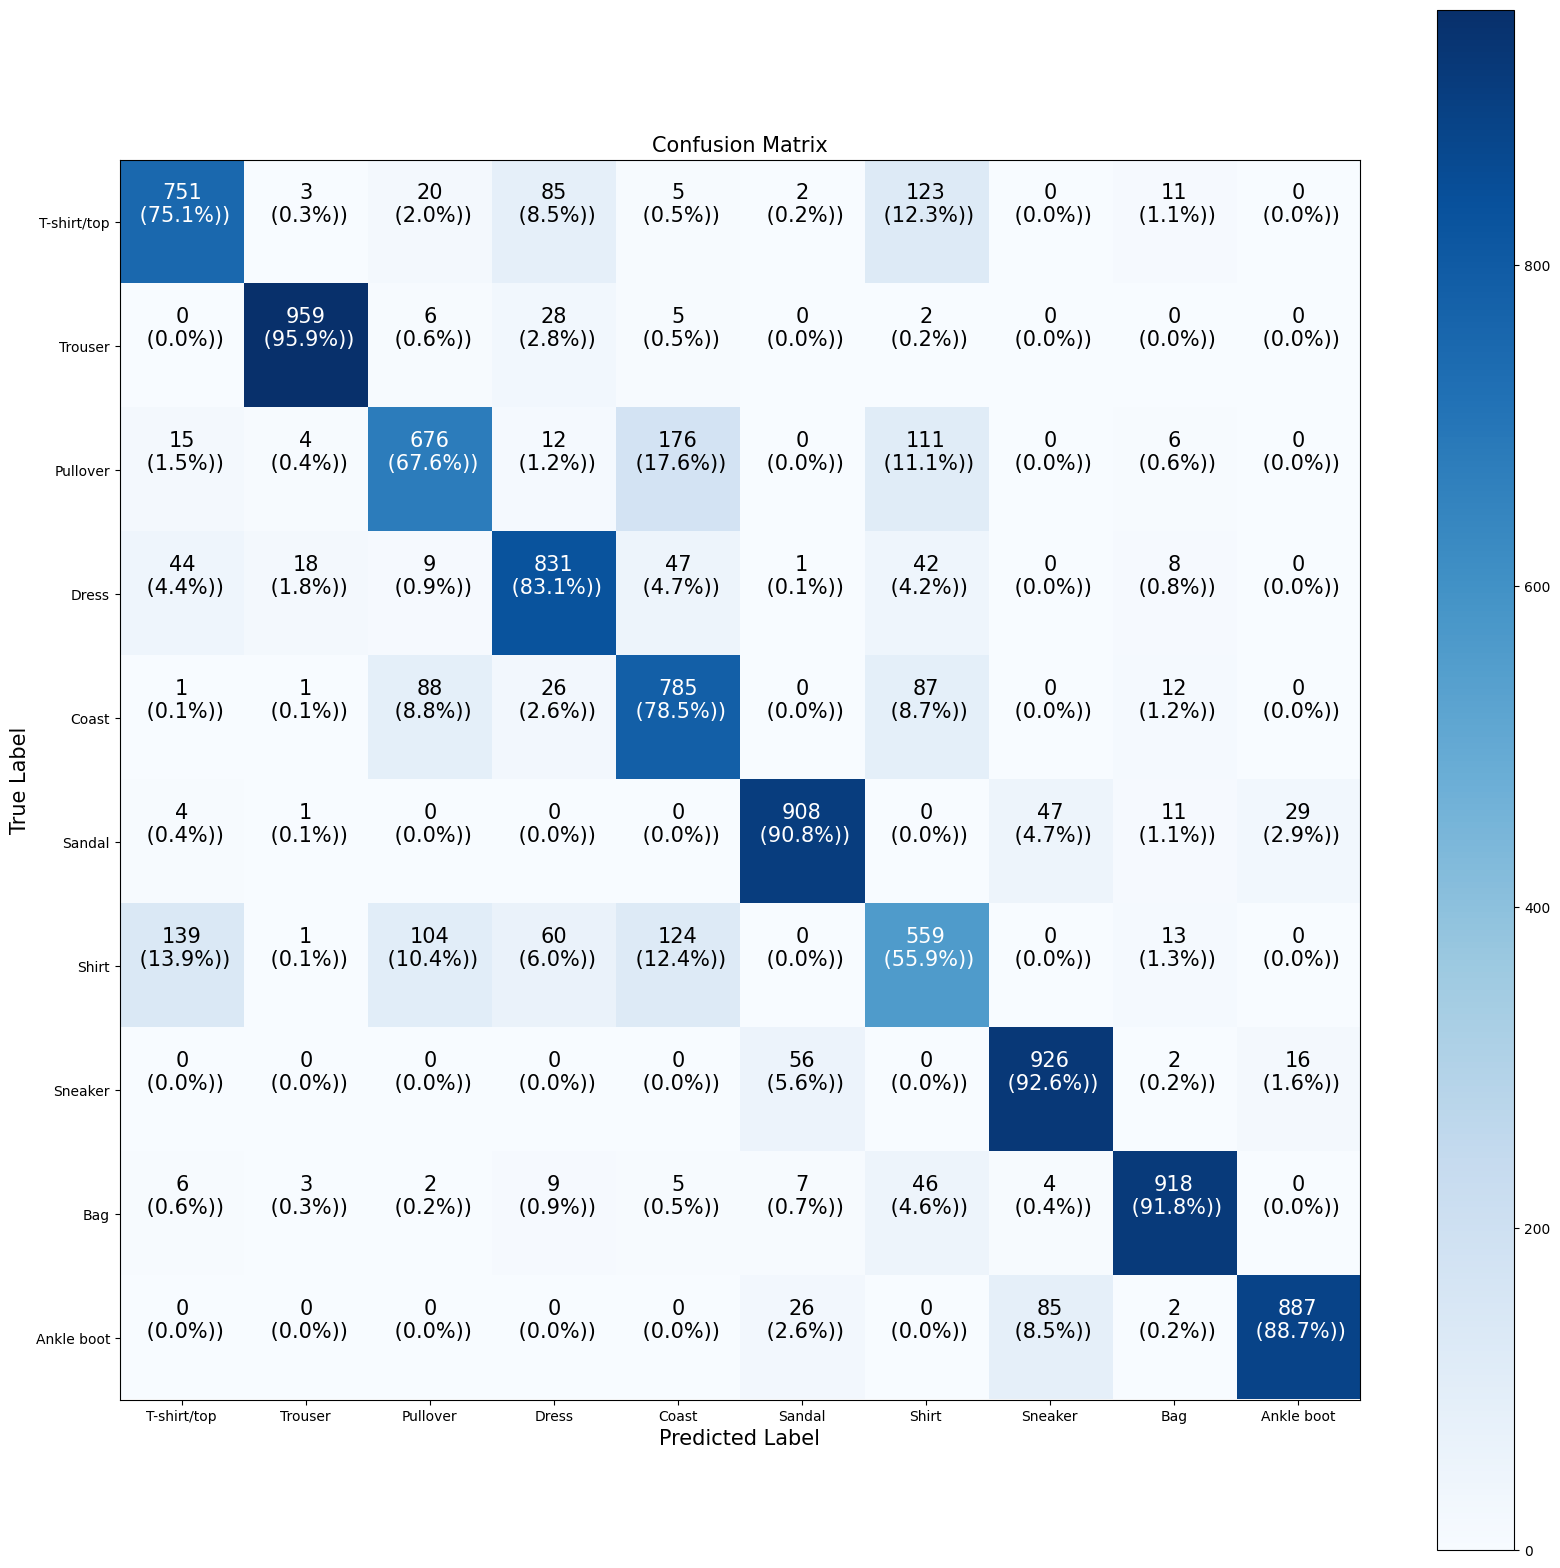

In [135]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,y_pred=y_preds, classes=class_names, figsize=(20,20), text_size=15)

# y_true, y_pred, classes=False, figsize=(10, 10), text_size=15

In [146]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it, and labels it with a prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
                                                  color=color)

1/1 [==============================] - 0s 21ms/step


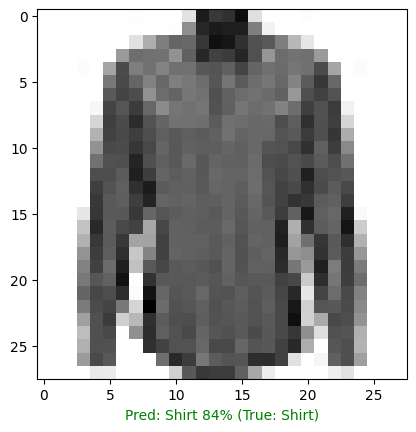

In [167]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns are our model learning?

In [168]:
# Find the layers of our most recent model
model_14.layers

In [169]:
# Extract a particular layer
model_14.layers[1]

In [170]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.12436249, -0.00731619,  0.0577627 ,  0.10952097],
        [-0.40293133,  0.23613207, -0.29887375,  0.06798598],
        [-1.1839285 , -0.45546052, -0.17282484, -0.48628595],
        ...,
        [-0.26712668,  0.30527654, -0.28658566,  0.09782845],
        [ 0.21998322,  0.27308047, -0.40685198,  0.196889  ],
        [-0.18258685, -0.09559386, -0.3536982 ,  0.56702733]],
       dtype=float32),
 (784, 4))

In [171]:
model_14.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_101 (Dense)           (None, 4)                 3140      
                                                                 
 dense_102 (Dense)           (None, 4)                 20        
                                                                 
 dense_103 (Dense)           (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check the bias vector...

In [172]:
# Bias and biases shapes
biases, biases.shape

(array([1.5488778 , 1.3119614 , 0.62036765, 0.3241055 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

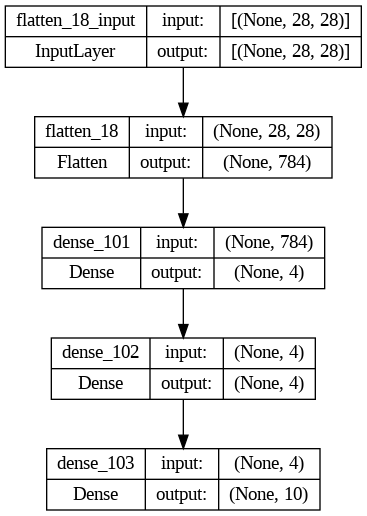

In [174]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)